In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yaml

In [2]:
sns.set(font_scale=5) 
sns.set_style("white", {"xtick.bottom": True,'ytick.left': True})
sns.set_context("poster")
sns.set_palette(sns.color_palette("deep"))

In [3]:
with open('../Experimental_Data/pure_density_SI.yml', 'r') as file:
    data_exp_dens = yaml.safe_load(file)
display(pd.DataFrame(data_exp_dens))

,Temperature (K),Dioxane (Sim),Formic acid (Sim),Dioxane (Exp),Dioxane STD (Exp),Formic acid (Exp),Formic acid STD (Exp),Dioxane (Gupta et al.),Formic acid (Gupta et al.)
0,293.15,1043.43780,1223.7550,1033.618410,0.000000,1219.896244,3.348914,1034.0,1221.0
1,295.15,1041.08540,1221.2876,NaN,0.000000,1209.265000,8.935000,NaN,NaN
2,298.15,1037.66280,1217.6072,1028.970607,1.287997,1214.425093,3.905868,NaN,NaN
3,303.15,1031.80340,1211.5294,1022.252220,0.088110,1208.911617,4.245378,1031.3,1216.1
4,313.15,1020.05740,1199.2596,1010.753865,0.308385,1196.922736,5.553200,1028.5,1212.9
5,323.15,1020.08720,1186.8726,1000.371570,1.716575,1182.656000,5.893414,NaN,NaN
6,348.15,978.43912,1155.5100,970.670000,0.000000,1153.800000,1.883260,NaN,NaN


[1034.0, None, None, 1031.3, 1028.5, None, None] [1219.896244, 1209.265, 1214.425093, 1208.911617, 1196.922736, 1182.656, 1153.8]
hi 1034.0
hi 1031.3
hi 1028.5


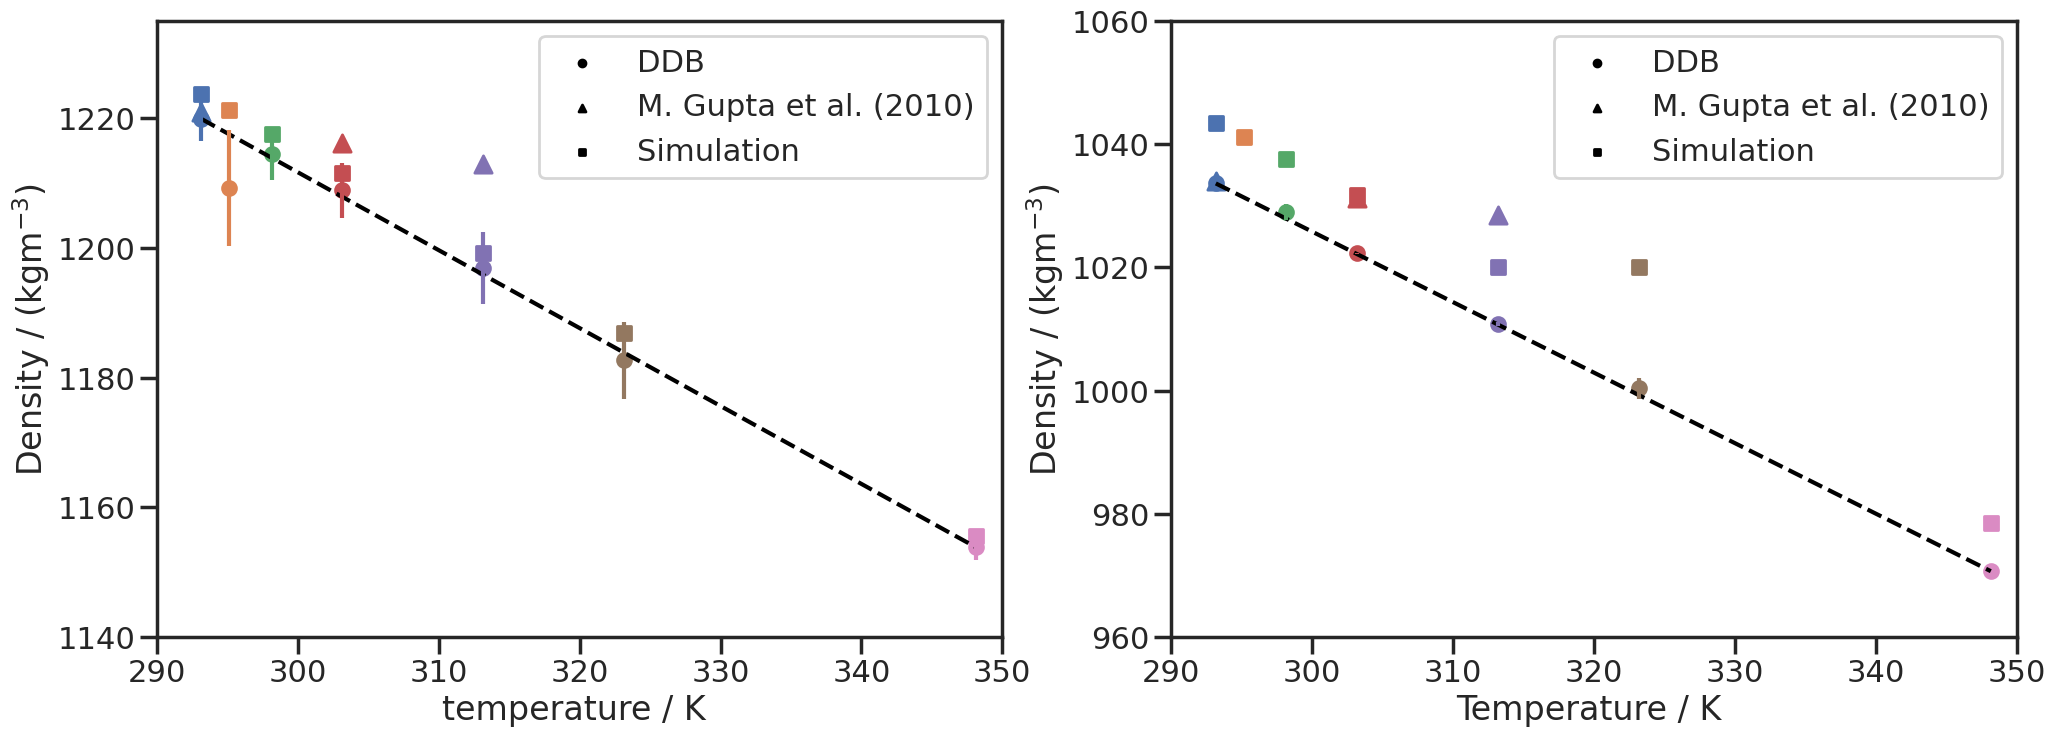

In [4]:
plt.figure(figsize=(24,8))
color= sns.color_palette("deep")
gap_mix = [0,2,2,2]

temp = data_exp_dens["Temperature (K)"]
dioxane_gupta = data_exp_dens["Dioxane (Gupta et al.)"]
formic_acid_gupta = data_exp_dens["Formic acid (Gupta et al.)"]
formic_acid_exp = data_exp_dens["Formic acid (Exp)"]
formic_acid_sim = data_exp_dens["Formic acid (Sim)"]
formic_acid_exp_std = data_exp_dens["Formic acid STD (Exp)"]
dioxane_exp = data_exp_dens["Dioxane (Exp)"]
dioxane_sim = data_exp_dens["Dioxane (Sim)"]
dioxane_exp_std = data_exp_dens["Dioxane STD (Exp)"]

print(dioxane_gupta,formic_acid_exp)
# Plotplt.figure(figsize=(24,8))
color= sns.color_palette("deep")
gap_mix = [0,2,2,2]



# Plot
plt.subplot(1,2,1)  
plt.plot([temp[0], temp[-1]],[formic_acid_exp[0],formic_acid_exp[-1]], linestyle = "--", color="black")
plt.scatter([0],[0], marker = "o", label = "DDB", s=25,color = "black")
plt.scatter([293.15],[1221.0], marker = "^", label = "M. Gupta et al. (2010)",s=25, color = "black")
plt.scatter([0],[0], marker = "s", label = "Simulation", s=25,color = "black")
plt.legend()

plt.subplot(1,2,2)
plt.plot([temp[0], temp[-1]],[dioxane_exp[0],dioxane_exp[-1]], linestyle = "--", color="black")
plt.scatter([0],[0], marker = "o", label = "DDB",s=25, color = "black")
plt.scatter([293.15],[1034.0], marker = "^", label = "M. Gupta et al. (2010)",s=25, color = "black")
plt.scatter([0],[0], marker = "s", label = "Simulation", s=25,color = "black")
plt.legend()

for i in range(len(temp)):
    plt.subplot(1,2,1)
    if formic_acid_exp[i]!=None:
        plt.scatter(temp[i],formic_acid_exp[i], marker = "o",s=100, color = color[i])
        plt.errorbar( temp[i],formic_acid_exp[i], formic_acid_exp_std[i], color = color[i] )
    plt.xlabel("temperature / K ")
    plt.ylabel("Density / ($\mathrm{kgm^{-3}}$)")
for i in range(len(temp)):
    plt.subplot(1,2,2)
    if dioxane_exp[i]!=None:
        plt.scatter(temp[i],dioxane_exp[i], marker = "o",s=100, color = color[i])
        plt.errorbar( temp[i],dioxane_exp[i], dioxane_exp_std[i], color = color[i] )
    plt.xlabel("Temperature / K ")
    plt.ylabel("Density / ($\mathrm{kgm^{-3}}$)")
for i in range(len(temp)):
    plt.subplot(1,2,2)
    plt.scatter(temp[i],dioxane_sim[i], marker = "s",s=100, color = color[i])
    plt.xlim([290,350])
    plt.ylim([960,1060])
    plt.subplot(1,2,1)
    plt.scatter(temp[i],formic_acid_sim[i], marker = "s",s=100, color = color[i])
    plt.xlim([290,350])
    plt.ylim([1140,1235])
for i in range(len(temp)):    
    if  dioxane_gupta[i]!=None:
        print("hi",dioxane_gupta[i])
        plt.subplot(1,2,2)
        plt.scatter(temp[i],dioxane_gupta[i], marker = "^", s=155, color = color[i])
        plt.subplot(1,2,1)
        plt.scatter(temp[i],formic_acid_gupta[i], marker = "^", s=155, color = color[i])


#plt.savefig("../plots/exp_dens_temp_SI.svg", format = "svg", dpi=1000)
